In [1]:
# Import libraries:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import Dataset
hr = pd.read_excel("HR Data.xlsx")
hr.head()

,Attrition,Business Travel,CF_age band,CF_attrition label,Department,Education Field,emp no,Employee Number,Gender,Job Role,...,Performance Rating,Relationship Satisfaction,Standard Hours,Stock Option Level,Total Working Years,Work Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager
0,Yes,Travel_Rarely,35 - 44,Ex-Employees,Sales,Life Sciences,STAFF-1,1,Female,Sales Executive,...,3,1,80,0,8,1,6,4,0,5
1,No,Travel_Frequently,45 - 54,Current Employees,R&D,Life Sciences,STAFF-2,2,Male,Research Scientist,...,4,4,80,1,10,3,10,7,1,7
2,Yes,Travel_Rarely,35 - 44,Ex-Employees,R&D,Other,STAFF-4,4,Male,Laboratory Technician,...,3,2,80,0,7,3,0,0,0,0
3,No,Travel_Frequently,25 - 34,Current Employees,R&D,Life Sciences,STAFF-5,5,Female,Research Scientist,...,3,3,80,0,8,3,8,7,3,0
4,No,Travel_Rarely,25 - 34,Current Employees,R&D,Medical,STAFF-7,7,Male,Laboratory Technician,...,3,4,80,1,6,3,2,2,2,2


# Data info:

In [3]:
hr.shape

(1470, 39)

In [4]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Attrition                   1470 non-null   object
 1   Business Travel             1470 non-null   object
 2   CF_age band                 1470 non-null   object
 3   CF_attrition label          1470 non-null   object
 4   Department                  1470 non-null   object
 5   Education Field             1470 non-null   object
 6   emp no                      1470 non-null   object
 7   Employee Number             1470 non-null   int64 
 8   Gender                      1470 non-null   object
 9   Job Role                    1470 non-null   object
 10  Marital Status              1470 non-null   object
 11  Over Time                   1470 non-null   object
 12  Over18                      1470 non-null   object
 13  Training Times Last Year    1470 non-null   int6

# Check for null Values:

In [5]:
hr.isnull().sum()

Attrition                     0
Business Travel               0
CF_age band                   0
CF_attrition label            0
Department                    0
Education Field               0
emp no                        0
Employee Number               0
Gender                        0
Job Role                      0
Marital Status                0
Over Time                     0
Over18                        0
Training Times Last Year      0
Age                           0
CF_current Employee           0
Daily Rate                    0
Distance From Home            0
Education                     0
Employee Count                0
Environment Satisfaction      0
Hourly Rate                   0
Job Involvement               0
Job Level                     0
Job Satisfaction              0
Monthly Income                0
Monthly Rate                  0
Num Companies Worked          0
Percent Salary Hike           0
Performance Rating            0
Relationship Satisfaction     0
Standard

# Check for Duplicates:

In [7]:
hr.duplicated(keep = False).sum()

0

# Exploratory Analysis:

# KPI

In [11]:
# Employee Count:
Total_Employee = hr["Employee Count"].sum()
Total_Employee

1470

In [10]:
# Attrition Count:
hr["Attrition"].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [20]:
# Attrition Rate:
hr[hr["Attrition"] == "Yes"].count()["Attrition"] / Total_Employee * 100

16.122448979591837

In [25]:
# Active Employees:
Active_Employee = hr[hr["Attrition"] == "No"].count()["Attrition"]
Active_Employee

1233

In [29]:
# Average Age:
hr["Age"].sum() / Total_Employee 

36.923809523809524

# Attrition by gender:

In [32]:
hr["Attrition"].unique()

array(['Yes', 'No'], dtype=object)

In [34]:
hr["Attrition"].replace({"Yes" : 1, "No" : 0}, inplace=True)

In [35]:
hr["Attrition"].dtype

dtype('int64')

In [52]:
gb_gender = hr.groupby("Gender", as_index=False).agg({"Attrition" : "sum"})
gb_gender

,Gender,Attrition
0,Female,87
1,Male,150


In [40]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [62]:
plt.style.use("seaborn-v0_8-pastel")

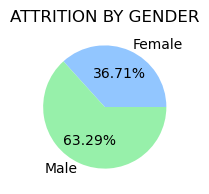

In [66]:
plt.figure(figsize=(8,2))
plt.title("ATTRITION BY GENDER")
plt.pie(gb_gender["Attrition"], labels = gb_gender["Gender"], autopct="%1.2f%%")
plt.show()

# Department-wise Attrition:

In [68]:
hr["Department"].unique()

array(['Sales', 'R&D', 'HR'], dtype=object)

In [72]:
gb_department = hr.groupby("Department").agg({"Attrition" : "sum"})
gb_department

,Attrition
Department,
HR,12
R&D,133
Sales,92


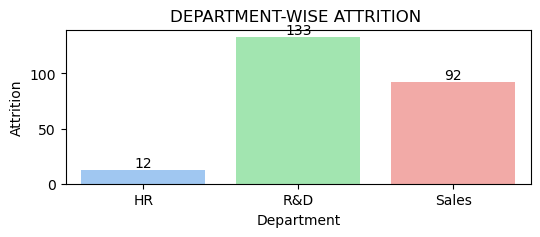

In [83]:
plt.figure(figsize=(6,2))
plt.title("DEPARTMENT-WISE ATTRITION")
ax = sns.barplot(gb_department, y = gb_department["Attrition"], x = gb_department.index)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

# Number of Employees by Age group:

In [86]:
age_groupCount = hr["CF_age band"].value_counts()
age_groupCount

25 - 34     554
35 - 44     505
45 - 54     245
Under 25     97
Over 55      69
Name: CF_age band, dtype: int64

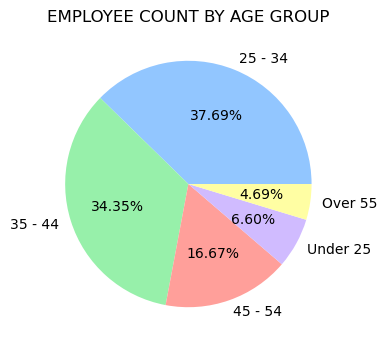

In [92]:
plt.figure(figsize=(6,4))
plt.title("EMPLOYEE COUNT BY AGE GROUP")
plt.pie(age_groupCount, labels = age_groupCount.index, autopct="%1.2f%%")
plt.show()

# Job Satisfaction Rating:

In [95]:
job_rating = hr["Job Satisfaction"].value_counts()
job_rating

4    459
3    442
1    289
2    280
Name: Job Satisfaction, dtype: int64

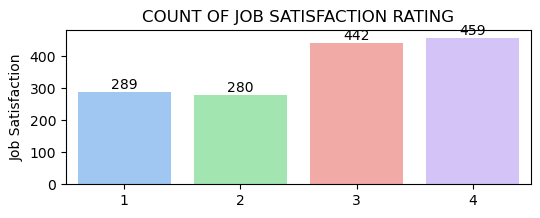

In [103]:
plt.figure(figsize=(6,2))
plt.title("COUNT OF JOB SATISFACTION RATING")
ax = sns.barplot(hr, y = job_rating, x = job_rating.index)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

# Education Field wise Attrition:

In [114]:
attrition_employees = hr[hr["Attrition"] == 1]
attrition_employees.head()

,Attrition,Business Travel,CF_age band,CF_attrition label,Department,Education Field,emp no,Employee Number,Gender,Job Role,...,Performance Rating,Relationship Satisfaction,Standard Hours,Stock Option Level,Total Working Years,Work Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager
0,1,Travel_Rarely,35 - 44,Ex-Employees,Sales,Life Sciences,STAFF-1,1,Female,Sales Executive,...,3,1,80,0,8,1,6,4,0,5
2,1,Travel_Rarely,35 - 44,Ex-Employees,R&D,Other,STAFF-4,4,Male,Laboratory Technician,...,3,2,80,0,7,3,0,0,0,0
14,1,Travel_Rarely,25 - 34,Ex-Employees,R&D,Life Sciences,STAFF-19,19,Male,Laboratory Technician,...,3,2,80,0,6,3,4,2,0,3
21,1,Travel_Rarely,35 - 44,Ex-Employees,Sales,Life Sciences,STAFF-27,27,Male,Sales Representative,...,4,2,80,0,10,3,5,3,0,3
24,1,Travel_Rarely,25 - 34,Ex-Employees,R&D,Medical,STAFF-31,31,Male,Research Scientist,...,3,3,80,0,8,3,4,2,1,3


In [115]:
attrition_employees.columns

Index(['Attrition', 'Business Travel', 'CF_age band', 'CF_attrition label',
       'Department', 'Education Field', 'emp no', 'Employee Number', 'Gender',
       'Job Role', 'Marital Status', 'Over Time', 'Over18',
       'Training Times Last Year', 'Age', 'CF_current Employee', 'Daily Rate',
       'Distance From Home', 'Education', 'Employee Count',
       'Environment Satisfaction', 'Hourly Rate', 'Job Involvement',
       'Job Level', 'Job Satisfaction', 'Monthly Income', 'Monthly Rate',
       'Num Companies Worked', 'Percent Salary Hike', 'Performance Rating',
       'Relationship Satisfaction', 'Standard Hours', 'Stock Option Level',
       'Total Working Years', 'Work Life Balance', 'Years At Company',
       'Years In Current Role', 'Years Since Last Promotion',
       'Years With Curr Manager'],
      dtype='object')

In [120]:
gb_Education = attrition_employees.groupby("Education").agg({"Attrition" : "count"}).sort_values(by = "Attrition", 
                                                                                                 ascending = False)
gb_Education

,Attrition
Education,
Bachelor's Degree,99
Master's Degree,58
Associates Degree,44
High School,31
Doctoral Degree,5


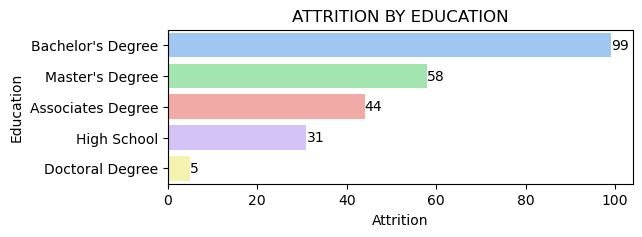

In [123]:
plt.figure(figsize=(6,2))
plt.title("ATTRITION BY EDUCATION")
ax =sns.barplot(gb_Education, x = gb_Education["Attrition"], y = gb_Education.index)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

# Attrition rate by Gender for different Age Group

In [129]:
gb_gender_ageband = attrition_employees.groupby(["Gender", "CF_age band"], as_index=False).agg({"Attrition" : "count"})
gb_gender_ageband

,Gender,CF_age band,Attrition
0,Female,25 - 34,43
1,Female,35 - 44,14
2,Female,45 - 54,9
3,Female,Over 55,3
4,Female,Under 25,18
5,Male,25 - 34,69
6,Male,35 - 44,37
7,Male,45 - 54,16
8,Male,Over 55,8
9,Male,Under 25,20


In [130]:
gb_gender_ageband.pivot_table(values = "Attrition", index = "CF_age band", columns= "Gender")

Gender,Female,Male
CF_age band,,
25 - 34,43,69
35 - 44,14,37
45 - 54,9,16
Over 55,3,8
Under 25,18,20
